In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Implementing KNN on Classification problem

In [156]:
data=pd.read_csv(r"D:\machine_learning\data\titanic_cleaned.csv")
data.shape

(891, 25)

In [157]:
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [158]:
data.isnull().sum()

Survived      0
Age           0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Sex_female    0
Sex_male      0
SibSp_0       0
SibSp_1       0
SibSp_2       0
SibSp_3       0
SibSp_4       0
SibSp_5       0
SibSp_8       0
Parch_0       0
Parch_1       0
Parch_2       0
Parch_3       0
Parch_4       0
Parch_5       0
Parch_6       0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

## Seperating independent and dependent variables

In [159]:
#seperating independent and dependent variables
x=data.drop(["Survived"],axis=1)
y=data["Survived"]
x.shape,y.shape

((891, 24), (891,))

## Scaling the data

In [160]:
#importing minmax scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)
#return array so we need to convert it to dataframe

In [161]:
x=pd.DataFrame(x_scaled,columns=x.columns)
x

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0.271174,0.014151,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.472229,0.139136,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.321438,0.015469,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.434531,0.103644,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.434531,0.015713,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.334004,0.025374,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
887,0.233476,0.058556,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
888,0.367921,0.045771,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
889,0.321438,0.058556,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [162]:
#splitting the data into train and test data
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=56,stratify=y)

## Implementing KNN classifier

In [163]:
#importing KNN function
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score

In [164]:
#creating instance of KNN
clf=KNN(n_neighbors=5)

#fitting the model
clf.fit(train_x,train_y)

#predicting over the Train set and calculating F1
test_predict=clf.predict(test_x)
k=f1_score(test_predict,test_y)
print("Test F1 score",k)

Test F1 score 0.6785714285714285


## Elbow for classifier

In [165]:
#defining elbow for classifier
#will pass the array to get the error
def elbow(k):
    error=[]
    for i in k:
        #creating instace of KNN
        clf=KNN(n_neighbors=i)
        #fitting the model
        clf.fit(train_x,train_y)
        #predicting over train set and calculating f1_score
        test_predict=clf.predict(test_x)
        k=f1_score(test_predict,test_y)
        error.append(1-k)
    return error

In [166]:
k=range(6,20,2)
test=elbow(k)

AttributeError: module 'matplotlib.pyplot' has no attribute 'ylanel'

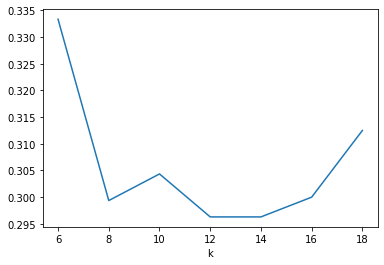

In [167]:
#plotting the curves
plt.plot(k,test)
plt.xlabel("k")
plt.ylanel("error")
plt.title("Elbow the for test")

In [169]:
#creating instance of KNN
clf=KNN(n_neighbors=12)

#fitting the model
clf.fit(train_x,train_y)

#predicting over the Train set and calculating F1
test_predict=clf.predict(test_x)
k=f1_score(test_predict,test_y)
print("Test F1 score",k)

Test F1 score 0.7037037037037037


# Implementing KNN for Regression problem

In [188]:
data=pd.read_csv(r"D:\machine_learning\data\big_mart_sale_cleaned.csv")
data.shape

(8523, 46)

In [189]:
data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [190]:
data.isnull().sum()

Item_Weight                        0
Item_Visibility                    0
Item_MRP                           0
Outlet_Establishment_Year          0
Item_Outlet_Sales                  0
Item_Fat_Content_LF                0
Item_Fat_Content_Low Fat           0
Item_Fat_Content_Regular           0
Item_Fat_Content_low fat           0
Item_Fat_Content_reg               0
Item_Type_Baking Goods             0
Item_Type_Breads                   0
Item_Type_Breakfast                0
Item_Type_Canned                   0
Item_Type_Dairy                    0
Item_Type_Frozen Foods             0
Item_Type_Fruits and Vegetables    0
Item_Type_Hard Drinks              0
Item_Type_Health and Hygiene       0
Item_Type_Household                0
Item_Type_Meat                     0
Item_Type_Others                   0
Item_Type_Seafood                  0
Item_Type_Snack Foods              0
Item_Type_Soft Drinks              0
Item_Type_Starchy Foods            0
Outlet_Identifier_OUT010           0
O

In [191]:
#seperating feature and target data
x=data.drop("Item_Outlet_Sales",axis=1)
y=data["Item_Outlet_Sales"]
x.shape,y.shape

((8523, 45), (8523,))

## Scaling the data

In [192]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
x_scaled=scale.fit_transform(x)
#return array so wee need to change into data frame
x=pd.DataFrame(x_scaled,columns=x.columns)

## Splitting the data into train and test

In [193]:
#importing train test data
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=56)

## Implementing KNN on regressor

In [194]:
#importing the KNN regressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error as mse

In [195]:
#creating instance of KNN
reg=KNN(n_neighbors=5)

#fitting the model
reg.fit(train_x,train_y)

#predicting the trainset and calculating mse
test_predict=reg.predict(test_x)
k=mse(test_predict,test_y)
print("Test MSE ",k)

Test MSE  1714854.6015010108


## Elbow for Regressor

In [196]:
#we will pass the array to find k
def elbow(k):
    test_mse=[]
    for i in k:
        #instance of KNN
        reg=KNN(n_neighbors=i)
        
        #fitting the regressor and predicting the values
        reg.fit(train_x,train_y)
        test_predict=reg.predict(test_x)
        k=mse(test_predict,test_y)
        test_mse.append(k)
        
    return test_mse

In [197]:
k=range(1,40)
test=elbow(k)

Text(0.5, 1.0, 'Elbow Curve for test')

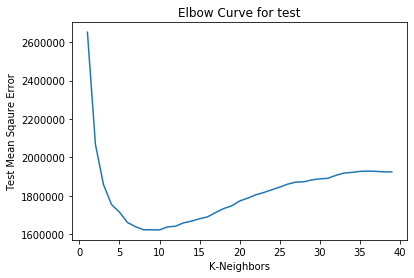

In [198]:
#plotting the values
plt.plot(k,test)
plt.xlabel("K-Neighbors")
plt.ylabel("Test Mean Sqaure Error")
plt.title("Elbow Curve for test")

In [199]:
#creating insatance of KNN
reg=KNN(n_neighbors=9)
#fitting the train data
reg.fit(train_x,train_y)
#predicting the values
test_predict=reg.predict(test_x)
k=mse(test_predict,test_y)
print("Test MSE ",k)

Test MSE  1622957.615752187
